In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam,SGD

## Data

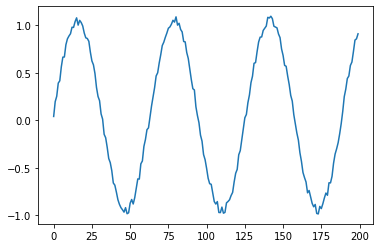

In [47]:
series = np.sin(0.1*np.arange(200)) + np.random.rand(200)*0.1
plt.plot(series)
plt.show()

In [48]:
T = 10
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}")

X.shape: (190, 10), Y.shape: (190,)


## Model

In [0]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)

model.compile(loss='mse',
              optimizer=Adam(lr=0.1))

In [50]:
model.fit(X[:-N//2],Y[:-N//2],
          epochs=80,
          validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 24ms/step - loss: 1.2482 - val_loss: 0.4069
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 0.7770 - val_loss: 0.6216
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 0.4879 - val_loss: 0.1497
Epoch 4/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1583 - val_loss: 0.2587
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.3244 - val_loss: 0.1374
Epoch 6/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1016 - val_loss: 0.0543
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0693 - val_loss: 0.1304
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1022 - val_loss: 0.0274
Epoch 9/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0158 - val_loss: 0.0395
Epoch 10/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0580 - val_loss: 0.0773
Epoch 11/80
3/3 [============

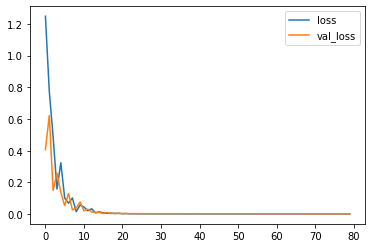

In [51]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(6,4))
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Forecasting

In [0]:
validation_data = Y[-N//2:]
validation_pred = []

last_x = X[-N//2] # 1-D array

while len(validation_pred) < len(validation_data):
  
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_pred.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

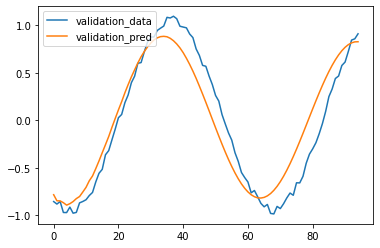

In [53]:
plt.plot(validation_data,label='validation_data')
plt.plot(validation_pred,label='validation_pred')
plt.legend()
plt.show()